# Определение перспективного тарифа для телеком-компании

## Описание проекта

***Цель исследования*** - определение оптимального тарифа телеком-оператора для прогнозирования выручки, а также корректировки условий тарифов.

***Задачи исследования***:

1. Изучение количества потребляемых телекоммуникационных услуг в общем и в разрезе тарифов;
2. Определение перспективного тарифа по объему выручки;
3. Разработка рекомендаций для руководства телеком-компании с учетом полученных данных.

***Описание тарифов***

***Тариф «Смарт»***

Ежемесячная плата: 550 рублей 

Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика 

Стоимость услуг сверх тарифного пакета: 1. минута разговора: 3 рубля («Мегалайн» всегда округляет вверх значения минут и мегабайтов. Если пользователь проговорил всего 1 секунду, в тарифе засчитывается целая минута); 2. сообщение: 3 рубля; 3. 1 Гб интернет-трафика: 200 рублей. 

***Тариф «Ультра»***

Ежемесячная плата: 1950 рублей 

Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика 

Стоимость услуг сверх тарифного пакета: 1. минута разговора: 1 рубль; 2. сообщение: 1 рубль; 3. 1 Гб интернет-трафика: 150 рублей. 

***Примечание:*** 

«Мегалайн» всегда округляет секунды до минут, а мегабайты — до гигабайт. Каждый звонок округляется отдельно: даже если он длился всего 1 секунду, будет засчитан как 1 минута. 

Для веб-трафика отдельные сессии не считаются. Вместо этого общая сумма за месяц округляется в бо́льшую сторону. Если абонент использует 1025 мегабайт в этом месяце, с него возьмут плату за 2 гигабайта. 

***Описание данных***

***Таблица users (информация о пользователях):*** 

user_id — уникальный идентификатор пользователя 

first_name — имя пользователя 

last_name — фамилия пользователя 

age — возраст пользователя (годы) 

reg_date — дата подключения тарифа (день, месяц, год) 

churn_date —  дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)

city — город проживания пользователя 

tarif — название тарифного плана 

***Таблица calls (информация о звонках):***

id — уникальный номер звонка 

call_date — дата звонка 

duration — длительность звонка в минутах 

user_id — идентификатор пользователя, сделавшего звонок 

***Таблица messages (информация о сообщениях):*** 

id — уникальный номер сообщения 

message_date — дата сообщения 

user_id — идентификатор пользователя, отправившего сообщение 

***Таблица internet (информация об интернет-сессиях):*** 

id — уникальный номер сессии 

mb_used — объём потраченного за сессию интернет-трафика (в мегабайтах) 

session_date — дата интернет-сессии 

user_id — идентификатор пользователя 

***Таблица tariffs (информация о тарифах):***

tariff_name — название тарифа 

rub_monthly_fee — ежемесячная абонентская плата в рублях 

minutes_included — количество минут разговора в месяц, включённых в абонентскую плату 

messages_included — количество сообщений в месяц, включённых в абонентскую плату 

mb_per_month_included — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах) 

rub_per_minute — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата) 

rub_per_message — стоимость отправки сообщения сверх тарифного пакета 

rub_per_gb — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта) 

## Изучение данных из файла

Для того, чтобы понять, какие данные необходимо исследовать, необходимо открыть файлы и понять, что там содержится.

In [1]:
#импортируем все необходимые библиотеки

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st

In [2]:
#прочитаем датасет calls

data_calls = pd.read_csv('/datasets/calls.csv', sep = ',')

#выведем датасет на экран

data_calls.head(10)

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000
5,1000_5,2018-11-02,0.00,1000
6,1000_6,2018-10-18,0.00,1000
7,1000_7,2018-08-22,18.31,1000
8,1000_8,2018-09-15,18.44,1000
9,1000_9,2018-08-15,0.00,1000


In [3]:
#изучим общую информацию о датасете

data_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


Исходя из общих данных о датасете видно, что есть несоответствия типов данных: в столбце 'call_date' - object вместо datetime64.

In [4]:
#прочитаем датасет internet

data_internet = pd.read_csv('/datasets/internet.csv', sep = ',')

#выведем датасет на экран

data_internet.head(10)

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000
5,5,1000_5,399.97,2018-10-02,1000
6,6,1000_6,540.08,2018-09-07,1000
7,7,1000_7,415.70,2018-07-11,1000
8,8,1000_8,505.40,2018-10-08,1000
9,9,1000_9,345.54,2018-09-03,1000


In [5]:
#изучим общую информацию о датасете

data_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


В датасете с данными об использовании трафика также есть несответствие данных типу: в столбце 'session_date' - object вместо datetime.

In [6]:
#прочитаем датасет messages

data_messages = pd.read_csv('/datasets/messages.csv', sep = ',')

#выведем датасет на экран

data_messages.head(10)

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000
5,1000_5,2018-06-20,1000
6,1000_6,2018-11-19,1000
7,1000_7,2018-10-29,1000
8,1000_8,2018-06-25,1000
9,1000_9,2018-12-18,1000


In [7]:
#изучим общую информацию о датасете

data_messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


В датасете data_messages также есть несответствие данных типу: в столбце 'message_date' - object вместо datetime64.

In [8]:
#прочитаем датасет tariffs

data_tariffs = pd.read_csv('/datasets/tariffs.csv', sep = ',')

#выведем датасет на экран

data_tariffs

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [9]:
#изучим общую информацию о датасете

data_tariffs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
rub_monthly_fee          2 non-null int64
rub_per_gb               2 non-null int64
rub_per_message          2 non-null int64
rub_per_minute           2 non-null int64
tariff_name              2 non-null object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


В датасете data_tariffs не обнаружено несоответствие типов данных.

In [10]:
#прочитаем датасет users

data_users = pd.read_csv('/datasets/users.csv', sep = ',')

#выведем датасет на экран

data_users.head(10)

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra
5,1005,67,NaN,Набережные Челны,Афанасий,Горлов,2018-01-25,smart
6,1006,21,NaN,Ульяновск,Леонид,Ермолаев,2018-02-26,smart
7,1007,65,NaN,Москва,Юна,Березина,2018-04-19,smart
8,1008,63,NaN,Челябинск,Рустэм,Пономарёв,2018-12-19,smart
9,1009,24,NaN,Пермь,Василиса,Блинова,2018-03-22,smart


In [11]:
#изучим общую информацию о датасете

data_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


Из данных о датасете мы видим, что есть пропущенные значения, а также несоответствие типам данных в столбцах с данными о датах.

### Вывод

Исходя из изученных данных видно, что во всех предоставленных датасетах, кроме data_users, встречается несоответствие типу данных значений в столбцах с данными о дате, а именно object вместо datetime. Эти недостатки необходимо устранить в ходе предобработки данных.

## Предобработка данных

### Поиск пропусков и дубликатов

Для того, чтобы приступить к исследованию, необходимо понять, есть ли в данных пропуски и дубликаты, привести данные к нужным типам данных.

In [12]:
#объявим функцию для поиска и оценки количества и доли пропусков и дубликатов

def data_isna(data): #объявляем функцию data_isna
    print(f'Количество пропусков:{data.isna().sum()}') #с помощью методов isna() и sum() посчитаем количество пропусков
    print(f'Доля пропусков:{data.isna().sum()*100/len(data)}') #с помощью методов isna(),sum() и количества строк посчитаем долю пропусков
    print(f'Количество дубликатов:{data.duplicated().sum()}') #посчитаем количество дубликатов
    print(f'Доля дубликатов:{data.duplicated().sum()*100/len(data)}') #посчитаем долю дубликатов
#изучим количество пропусков и дубликатов в датасете data_calls

data_isna(data_calls)

Количество пропусков:id           0
call_date    0
duration     0
user_id      0
dtype: int64
Доля пропусков:id           0.0
call_date    0.0
duration     0.0
user_id      0.0
dtype: float64
Количество дубликатов:0
Доля дубликатов:0.0


In [13]:
#изучим количество пропусков и дубликатов в датасете data_internet

data_isna(data_internet)

Количество пропусков:Unnamed: 0      0
id              0
mb_used         0
session_date    0
user_id         0
dtype: int64
Доля пропусков:Unnamed: 0      0.0
id              0.0
mb_used         0.0
session_date    0.0
user_id         0.0
dtype: float64
Количество дубликатов:0
Доля дубликатов:0.0


In [14]:
#изучим количество пропусков и дубликатов в датасете data_messages

data_isna(data_messages)

Количество пропусков:id              0
message_date    0
user_id         0
dtype: int64
Доля пропусков:id              0.0
message_date    0.0
user_id         0.0
dtype: float64
Количество дубликатов:0
Доля дубликатов:0.0


In [15]:
#изучим количество пропусков и дубликатов в датасете data_tariffs

data_isna(data_tariffs)

Количество пропусков:messages_included        0
mb_per_month_included    0
minutes_included         0
rub_monthly_fee          0
rub_per_gb               0
rub_per_message          0
rub_per_minute           0
tariff_name              0
dtype: int64
Доля пропусков:messages_included        0.0
mb_per_month_included    0.0
minutes_included         0.0
rub_monthly_fee          0.0
rub_per_gb               0.0
rub_per_message          0.0
rub_per_minute           0.0
tariff_name              0.0
dtype: float64
Количество дубликатов:0
Доля дубликатов:0.0


In [16]:
#изучим количество пропусков и дубликатов в датасете data_users

data_isna(data_users)

Количество пропусков:user_id         0
age             0
churn_date    462
city            0
first_name      0
last_name       0
reg_date        0
tariff          0
dtype: int64
Доля пропусков:user_id        0.0
age            0.0
churn_date    92.4
city           0.0
first_name     0.0
last_name      0.0
reg_date       0.0
tariff         0.0
dtype: float64
Количество дубликатов:0
Доля дубликатов:0.0


Изучив данные о пропусках и дубликатах, видно, что пропуски присутствуют только в датасете data_users в столбце с данными о дате прекращения пользования тарифом, но по условиям задания, если значение пропущено, то тариф ещё действовал на момент выгрузки данных, поэтому пропуски обрабатывать не нужно. Дубликаты не были обнаружены ни в одном из датасетов.

### Изменение типов данных

In [17]:
#объявим функцию для замены типа данных str в столбцах датасетов на datetime

def datetime_function(data:pd.DataFrame,colname:str): #объявим функцию datetime_function
    data[colname] = pd.to_datetime(data[colname],format ='%Y-%m-%dT%H:%M:%S') #c помощью метода to_datetime заменим тип данных с object64 на datetime64
    return data[colname] #вернем результат работы функции
    

In [18]:
#заменим тип данных в столбце 'call_date' датасета data_calls

datetime_function(data_calls,'call_date')

0        2018-07-25
1        2018-08-17
2        2018-06-11
3        2018-09-21
4        2018-12-15
            ...    
202602   2018-12-26
202603   2018-10-18
202604   2018-11-10
202605   2018-10-06
202606   2018-12-14
Name: call_date, Length: 202607, dtype: datetime64[ns]

In [19]:
#заменим тип данных в столбце 'session_date' датасета data_internet

datetime_function(data_internet,'session_date')

0        2018-11-25
1        2018-09-07
2        2018-06-25
3        2018-08-22
4        2018-09-24
            ...    
149391   2018-10-03
149392   2018-12-14
149393   2018-10-27
149394   2018-11-26
149395   2018-10-26
Name: session_date, Length: 149396, dtype: datetime64[ns]

In [20]:
#заменим тип данных в столбце 'message_date' датасета data_messages

datetime_function(data_messages,'message_date')

0        2018-06-27
1        2018-10-08
2        2018-08-04
3        2018-06-16
4        2018-12-05
            ...    
123031   2018-12-12
123032   2018-09-28
123033   2018-09-27
123034   2018-11-15
123035   2018-11-16
Name: message_date, Length: 123036, dtype: datetime64[ns]

In [21]:
#заменим тип данных в столбце 'reg_date' датасета data_users

datetime_function(data_users,'reg_date')

0     2018-05-25
1     2018-11-01
2     2018-06-17
3     2018-08-17
4     2018-05-14
         ...    
495   2018-08-28
496   2018-01-27
497   2018-10-09
498   2018-07-19
499   2018-09-27
Name: reg_date, Length: 500, dtype: datetime64[ns]

### Вывод

В ходе предобработки были обнаружены пропущенные значения в датасете data_users в столбце со значениями даты прекращения действия тарифа. Однако, исходя из примечаний к проекту видно, что эти значения говорят о том, что на момент выгрузки тариф еще был активен, поэтому эти пропуски не были обработаны. Также были значения, содержащие данные о дате, были приведены к необходимому типу данных - к datetime.

## Подготовка данных к проведению исследования

### Добавление необходимых данных, приведение единиц измерения к нужному типу

Для дальнейшего проведения анализа нам необходимо добавить столбцы, содержащие данные о месяце. 

In [22]:
#объявим функцию для добавления столбца 'month'

def month_function(data:pd.DataFrame,colname:str): #объявим функцию month_function
    data['month'] = data[colname].dt.month #создадим новый столбец 'month' с результатом работы метода dt.month
    return data['month'] #вернем результат работы функции

In [23]:
#создадим новый столбец 'month' в датасете data_calls

month_function(data_calls,'call_date')

0          7
1          8
2          6
3          9
4         12
          ..
202602    12
202603    10
202604    11
202605    10
202606    12
Name: month, Length: 202607, dtype: int64

In [24]:
#создадим новый столбец 'month' в датасете data_internet

month_function(data_internet,'session_date')

0         11
1          9
2          6
3          8
4          9
          ..
149391    10
149392    12
149393    10
149394    11
149395    10
Name: month, Length: 149396, dtype: int64

In [25]:
#создадим новый столбец 'month' в датасете data_messages

month_function(data_messages,'message_date')

0          6
1         10
2          8
3          6
4         12
          ..
123031    12
123032     9
123033     9
123034    11
123035    11
Name: month, Length: 123036, dtype: int64

In [26]:
#создадим новый столбец 'month' в датасете data_users

month_function(data_users,'reg_date')

0       5
1      11
2       6
3       8
4       5
       ..
495     8
496     1
497    10
498     7
499     9
Name: month, Length: 500, dtype: int64

Для корректности дальнейших расчетов необходимо привести данные о звонках и используемом трафике в соответствие с условиями тарифов: округлить секунды звонков до минут, а Мегабайты трафика до Гигабайт.

In [27]:
#округлим в большую сторону длительность звонков

data_calls['duration'] = data_calls['duration'].apply(np.ceil).replace(0,1).astype(int)

#выведем первые 10 строк столбца 'duration' на экран

data_calls['duration'].head(10)

0     1
1     1
2     3
3    14
4     6
5     1
6     1
7    19
8    19
9     1
Name: duration, dtype: int64

In [28]:
#округлим в большую сторону использование трафика и переведем мегабайты в гигабайты и для удобства 
#округлим до сотых. Результат сохраним в новом столбце 'gb_used'

data_internet['gb_used'] = ((data_internet['mb_used'].apply(np.ceil).replace(0,1)) / 1024).round(2)

#выведем первые 10 строк столбца 'gb_used' на экран

data_internet['gb_used'].head(10)

0    0.11
1    1.03
2    1.17
3    0.54
4    0.30
5    0.39
6    0.53
7    0.41
8    0.49
9    0.34
Name: gb_used, dtype: float64

In [29]:
#округлим в большую сторону включенный трафик и переведем мегабайты в гигабайты и для удобства 
#округлим до сотых. Результат сохраним в новом столбце 'gb_per_month_included'

data_tariffs['gb_per_month_included'] = ((data_tariffs['mb_per_month_included'].apply(np.ceil).replace(0,1)) / 1024).round(2)

#выведем столбец 'gb_per_month_included' на экран

data_tariffs['gb_per_month_included']

0    15.0
1    30.0
Name: gb_per_month_included, dtype: float64

### Расчет количества израсходованных телекоммуникационных услуг

Далее для каждого пользователя нам нужно посчитать:
- количество сделанных звонков и израсходованных минут разговора по месяцам;
- количество отправленных сообщений по месяцам;
- объем израсходованного интернет-трафика по месяцам;
- помесячную выручку с каждого пользователя.

In [30]:
#с помощью сводной таблицы посчитаем количество сделанных звонков и израсходованных минут разговора
#по месяцам

data_calls_total = data_calls.pivot_table(index=['user_id', 'month'], values='duration',
                                          aggfunc=('sum', 'count')).reset_index()

#выведем первые 10 строк датасета на экран

data_calls_total.head(10)

,user_id,month,count,sum
0,1000,5,22,164
1,1000,6,43,187
2,1000,7,47,346
3,1000,8,52,418
4,1000,9,58,478
5,1000,10,57,363
6,1000,11,43,344
7,1000,12,46,341
8,1001,11,59,444
9,1001,12,63,430


In [31]:
#с помощью сводной таблицы посчитаем количество отправленных сообщений по месяцам

data_messages_total = data_messages.pivot_table(index=['user_id', 'month'], values='id',
                                                aggfunc='count').reset_index()

#выведем первые 10 строк датасета на экран

data_messages_total.head(10)

,user_id,month,id
0,1000,5,22
1,1000,6,60
2,1000,7,75
3,1000,8,81
4,1000,9,57
5,1000,10,73
6,1000,11,58
7,1000,12,70
8,1002,6,4
9,1002,7,11


In [32]:
#с помощью сводной таблицы посчитаем количество израсходованного интернет-трафика по месяцам

data_internet_total = data_internet.pivot_table(index=['user_id', 'month'], values='gb_used',
                                                aggfunc='sum').reset_index()

#выведем первые 10 строк датасета на экран

data_internet_total.head(10)

,user_id,month,gb_used
0,1000,5,2.20
1,1000,6,22.69
2,1000,7,13.71
3,1000,8,13.75
4,1000,9,14.27
5,1000,10,14.37
6,1000,11,14.41
7,1000,12,9.56
8,1001,11,17.99
9,1001,12,13.73


In [33]:
#создадим новую таблицу calls_messages_data, содержащую информацию о звонках и сообщениях

calls_messages_data = data_calls_total.merge(data_messages_total, 
                                             on=['user_id','month'], how = 'outer')

#выведем первые 10 строк датасета на экран

calls_messages_data.head(10)

,user_id,month,count,sum,id
0,1000,5,22.0,164.0,22.0
1,1000,6,43.0,187.0,60.0
2,1000,7,47.0,346.0,75.0
3,1000,8,52.0,418.0,81.0
4,1000,9,58.0,478.0,57.0
5,1000,10,57.0,363.0,73.0
6,1000,11,43.0,344.0,58.0
7,1000,12,46.0,341.0,70.0
8,1001,11,59.0,444.0,NaN
9,1001,12,63.0,430.0,NaN


In [34]:
#проверим количество и рассчитаем долю пропусков в датасете после объединения

data_isna(calls_messages_data)

Количество пропусков:user_id      0
month        0
count       39
sum         39
id         496
dtype: int64
Доля пропусков:user_id     0.000000
month       0.000000
count       1.213819
sum         1.213819
id         15.437286
dtype: float64
Количество дубликатов:0
Доля дубликатов:0.0


Из представленных данных видно, что в ходе объединения двух датасетов образовались пропуски значений. Для того, чтобы пропуски учитывались в дальнейшем при расчетах, заменим их на нулевые значения.

In [35]:
#заменим пропуски в столбцах датасета calls_messages_data на нулевые значения

calls_messages_data = calls_messages_data.fillna({'count': 0,
                                                 'sum': 0,
                                                 'id': 0})
#подсчитаем количество и долю пропусков

data_isna(calls_messages_data)

Количество пропусков:user_id    0
month      0
count      0
sum        0
id         0
dtype: int64
Доля пропусков:user_id    0.0
month      0.0
count      0.0
sum        0.0
id         0.0
dtype: float64
Количество дубликатов:0
Доля дубликатов:0.0


In [36]:
#объединим таблицу с данными о звонках и сообщениях с датафреймом, содержащим данные об израсходованном 
#интернет-трафике. Данные поместим в новую таблицу services_data

services_data = calls_messages_data.merge(data_internet_total, on=['user_id','month'],
                                          how = 'outer')

#выведем первые 10 строк датасета на экран

services_data.head(10)

,user_id,month,count,sum,id,gb_used
0,1000,5,22.0,164.0,22.0,2.20
1,1000,6,43.0,187.0,60.0,22.69
2,1000,7,47.0,346.0,75.0,13.71
3,1000,8,52.0,418.0,81.0,13.75
4,1000,9,58.0,478.0,57.0,14.27
5,1000,10,57.0,363.0,73.0,14.37
6,1000,11,43.0,344.0,58.0,14.41
7,1000,12,46.0,341.0,70.0,9.56
8,1001,11,59.0,444.0,0.0,17.99
9,1001,12,63.0,430.0,0.0,13.73


In [37]:
#проверим количество и рассчитаем долю пропусков в датасете после объединения

data_isna(services_data)

Количество пропусков:user_id     0
month       0
count       1
sum         1
id          1
gb_used    11
dtype: int64
Доля пропусков:user_id    0.000000
month      0.000000
count      0.031114
sum        0.031114
id         0.031114
gb_used    0.342253
dtype: float64
Количество дубликатов:0
Доля дубликатов:0.0


In [38]:
#заменим пропуски в столбцах датасета services_data на нулевые значения

services_data = services_data.fillna({'count': 0,
                                      'sum': 0,
                                      'id': 0,
                                      'gb_used':0})

#подсчитаем количество и долю пропусков

data_isna(services_data)

Количество пропусков:user_id    0
month      0
count      0
sum        0
id         0
gb_used    0
dtype: int64
Доля пропусков:user_id    0.0
month      0.0
count      0.0
sum        0.0
id         0.0
gb_used    0.0
dtype: float64
Количество дубликатов:0
Доля дубликатов:0.0


In [39]:
#объединим полученные данные с данными о пользователях. Результат поместим в новый датасет total_data

total_data = services_data.merge(data_users, on=['user_id'],how = 'left')

#добавим в датасет информацию о тарифах

total_data = total_data.merge(data_tariffs, left_on='tariff', right_on='tariff_name', 
                              how = 'left')

#выведем первые 10 строк датасета на экран

total_data.head(10)

,user_id,month_x,count,sum,id,gb_used,age,churn_date,city,first_name,...,month_y,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name,gb_per_month_included
0,1000,5,22.0,164.0,22.0,2.20,52,NaN,Краснодар,Рафаил,...,5,1000,30720,3000,1950,150,1,1,ultra,30.0
1,1000,6,43.0,187.0,60.0,22.69,52,NaN,Краснодар,Рафаил,...,5,1000,30720,3000,1950,150,1,1,ultra,30.0
2,1000,7,47.0,346.0,75.0,13.71,52,NaN,Краснодар,Рафаил,...,5,1000,30720,3000,1950,150,1,1,ultra,30.0
3,1000,8,52.0,418.0,81.0,13.75,52,NaN,Краснодар,Рафаил,...,5,1000,30720,3000,1950,150,1,1,ultra,30.0
4,1000,9,58.0,478.0,57.0,14.27,52,NaN,Краснодар,Рафаил,...,5,1000,30720,3000,1950,150,1,1,ultra,30.0
5,1000,10,57.0,363.0,73.0,14.37,52,NaN,Краснодар,Рафаил,...,5,1000,30720,3000,1950,150,1,1,ultra,30.0
6,1000,11,43.0,344.0,58.0,14.41,52,NaN,Краснодар,Рафаил,...,5,1000,30720,3000,1950,150,1,1,ultra,30.0
7,1000,12,46.0,341.0,70.0,9.56,52,NaN,Краснодар,Рафаил,...,5,1000,30720,3000,1950,150,1,1,ultra,30.0
8,1001,11,59.0,444.0,0.0,17.99,41,NaN,Москва,Иван,...,11,50,15360,500,550,200,3,3,smart,15.0
9,1001,12,63.0,430.0,0.0,13.73,41,NaN,Москва,Иван,...,11,50,15360,500,550,200,3,3,smart,15.0


Для того, чтобы не запутаться со значениями в ходе проведения анализа, необходимо переименовать столбцы 'month_x','count','sum', 'id','month_y' в более подходящие названия.
                                     

In [40]:
#переименуем столбцы

total_data = total_data.rename(columns={'month_x':'month',
                                       'count':'calls_count',
                                       'sum':'total_calls_duration',
                                       'id':'messages_count',
                                       'month_y':'reg_month'})

#выведем первые 10 строк датасета на экран

total_data.head(10)

,user_id,month,calls_count,total_calls_duration,messages_count,gb_used,age,churn_date,city,first_name,...,reg_month,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name,gb_per_month_included
0,1000,5,22.0,164.0,22.0,2.20,52,NaN,Краснодар,Рафаил,...,5,1000,30720,3000,1950,150,1,1,ultra,30.0
1,1000,6,43.0,187.0,60.0,22.69,52,NaN,Краснодар,Рафаил,...,5,1000,30720,3000,1950,150,1,1,ultra,30.0
2,1000,7,47.0,346.0,75.0,13.71,52,NaN,Краснодар,Рафаил,...,5,1000,30720,3000,1950,150,1,1,ultra,30.0
3,1000,8,52.0,418.0,81.0,13.75,52,NaN,Краснодар,Рафаил,...,5,1000,30720,3000,1950,150,1,1,ultra,30.0
4,1000,9,58.0,478.0,57.0,14.27,52,NaN,Краснодар,Рафаил,...,5,1000,30720,3000,1950,150,1,1,ultra,30.0
5,1000,10,57.0,363.0,73.0,14.37,52,NaN,Краснодар,Рафаил,...,5,1000,30720,3000,1950,150,1,1,ultra,30.0
6,1000,11,43.0,344.0,58.0,14.41,52,NaN,Краснодар,Рафаил,...,5,1000,30720,3000,1950,150,1,1,ultra,30.0
7,1000,12,46.0,341.0,70.0,9.56,52,NaN,Краснодар,Рафаил,...,5,1000,30720,3000,1950,150,1,1,ultra,30.0
8,1001,11,59.0,444.0,0.0,17.99,41,NaN,Москва,Иван,...,11,50,15360,500,550,200,3,3,smart,15.0
9,1001,12,63.0,430.0,0.0,13.73,41,NaN,Москва,Иван,...,11,50,15360,500,550,200,3,3,smart,15.0


In [41]:
#подсчитаем количество и долю пропусков в датасете

data_isna(total_data)

Количество пропусков:user_id                     0
month                       0
calls_count                 0
total_calls_duration        0
messages_count              0
gb_used                     0
age                         0
churn_date               3027
city                        0
first_name                  0
last_name                   0
reg_date                    0
tariff                      0
reg_month                   0
messages_included           0
mb_per_month_included       0
minutes_included            0
rub_monthly_fee             0
rub_per_gb                  0
rub_per_message             0
rub_per_minute              0
tariff_name                 0
gb_per_month_included       0
dtype: int64
Доля пропусков:user_id                   0.000000
month                     0.000000
calls_count               0.000000
total_calls_duration      0.000000
messages_count            0.000000
gb_used                   0.000000
age                       0.000000
churn_date      

### Поиск аномальных значений

Для того, чтобы корректно рассчитать средние показатели, проверим как обстоят дела с аномальными значениями в столбцах c количественными переменными, которые нужны для проведения анализа: 'calls_count', 'messages_count', 'gb_used'.

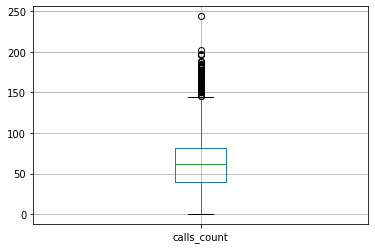

In [42]:
#построим график "ящик с усами"

total_data.boxplot(column = 'calls_count')

#выведем график на экран

plt.show()

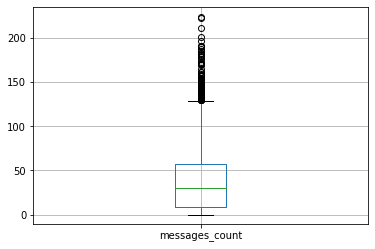

In [43]:
#построим график "ящик с усами"

total_data.boxplot(column = 'messages_count')

#выведем график на экран

plt.show()

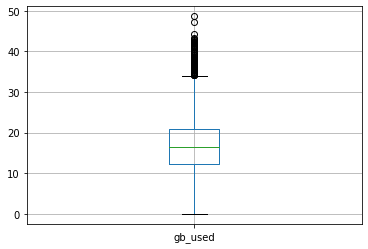

In [44]:
#построим график "ящик с усами"

total_data.boxplot(column = 'gb_used')

#выведем график на экран

plt.show()

### Расчет помесячной выручки с каждого пользователя

Для дальнейшего проведения исследования необходимо рассчитать помесячную выручку с каждого пользователя. Для расчета выручки удобнее всего использовать функцию.

In [45]:
#с помощью функции user_revenue_function рассчитаем помесячную выручку

def user_revenue_function(row): #объявим функцию user_revenue_function   
    if row['tariff_name'] == 'smart': #создадим необходимые условия
        calls_included = data_tariffs['minutes_included'][0]
        extra_calls_price = data_tariffs['rub_per_minute'][0]
        messages_included = data_tariffs['messages_included'][0]
        extra_messages_price = data_tariffs['rub_per_message'][0]
        gb_included = data_tariffs['gb_per_month_included'][0]
        extra_gb_price = data_tariffs['rub_per_gb'][0]
        tariff_price = data_tariffs['rub_monthly_fee'][0]
        
        if row['calls_count'] > calls_included: 
            calls_extra = (row['calls_count'] - calls_included) * extra_calls_price
        else:
            calls_extra = 0
        if row['messages_count'] > messages_included:
            messages_extra = (row['messages_count'] - messages_included) * extra_messages_price
        else:
            messages_extra = 0
        if row['gb_used'] >  gb_included:
            gb_used_extra = (row['gb_used'] -  gb_included) * extra_gb_price
        else:
            gb_used_extra = 0
    
        return tariff_price + calls_extra + messages_extra + gb_used_extra #вернем результат работы функции
    
    if row['tariff_name'] == 'ultra': #создадим необходимые условия
        calls_included = data_tariffs['minutes_included'][1]
        extra_calls_price = data_tariffs['rub_per_minute'][1]
        messages_included = data_tariffs['messages_included'][1]
        extra_messages_price = data_tariffs['rub_per_message'][1]
        gb_included = data_tariffs['gb_per_month_included'][1]
        extra_gb_price = data_tariffs['rub_per_gb'][1]
        tariff_price = data_tariffs['rub_monthly_fee'][1]
        
        if row['calls_count'] > calls_included:
            calls_extra = (row['calls_count'] - calls_included) * extra_calls_price
        else:
            calls_extra = 0
        if row['messages_count'] > messages_included:
            messages_extra = (row['messages_count'] - messages_included) * extra_messages_price 
        else:
            messages_extra = 0
        if row['gb_used'] > gb_included:
            gb_used_extra = (row['gb_used'] - gb_included) * extra_gb_price
        else:
            gb_used_extra = 0
    
        return tariff_price + calls_extra + messages_extra + gb_used_extra #вернем результат работы

In [46]:
#применим результат работы функции user_revenue_function ко всему датасету total_data. Результат сохраним
#в новом столбце 'user_revenue'

total_data['user_revenue'] = total_data.apply(user_revenue_function, axis = 1)

#выведем последние 20 строк датасета на экран для проверки

total_data.head(20)

,user_id,month,calls_count,total_calls_duration,messages_count,gb_used,age,churn_date,city,first_name,...,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name,gb_per_month_included,user_revenue
0,1000,5,22.0,164.0,22.0,2.20,52,NaN,Краснодар,Рафаил,...,1000,30720,3000,1950,150,1,1,ultra,30.0,1950.0
1,1000,6,43.0,187.0,60.0,22.69,52,NaN,Краснодар,Рафаил,...,1000,30720,3000,1950,150,1,1,ultra,30.0,1950.0
2,1000,7,47.0,346.0,75.0,13.71,52,NaN,Краснодар,Рафаил,...,1000,30720,3000,1950,150,1,1,ultra,30.0,1950.0
3,1000,8,52.0,418.0,81.0,13.75,52,NaN,Краснодар,Рафаил,...,1000,30720,3000,1950,150,1,1,ultra,30.0,1950.0
4,1000,9,58.0,478.0,57.0,14.27,52,NaN,Краснодар,Рафаил,...,1000,30720,3000,1950,150,1,1,ultra,30.0,1950.0
5,1000,10,57.0,363.0,73.0,14.37,52,NaN,Краснодар,Рафаил,...,1000,30720,3000,1950,150,1,1,ultra,30.0,1950.0
6,1000,11,43.0,344.0,58.0,14.41,52,NaN,Краснодар,Рафаил,...,1000,30720,3000,1950,150,1,1,ultra,30.0,1950.0
7,1000,12,46.0,341.0,70.0,9.56,52,NaN,Краснодар,Рафаил,...,1000,30720,3000,1950,150,1,1,ultra,30.0,1950.0
8,1001,11,59.0,444.0,0.0,17.99,41,NaN,Москва,Иван,...,50,15360,500,550,200,3,3,smart,15.0,1148.0
9,1001,12,63.0,430.0,0.0,13.73,41,NaN,Москва,Иван,...,50,15360,500,550,200,3,3,smart,15.0,550.0


### Вывод

В ходе подготовки данных к проведению исследования были сделаны следующие шаги:

1. В датасеты, содержащие информацию о звонках, сообщениях и израсходованном интернет-трафике были добавлены данные о месяце предоставления услуг;

2. В соответствиями с условиями тарифов "Смарт" и "Ультра" была округлена длительность звонков с секунд до минут и объем израсходованного интернет-трафика с Мегабайт до Гигабайт;

3. Рассчитана помесячная выручка с каждого пользователя.

При изучении длительности звонков, количества сообщений и израсходованного интернет-трафика были обнаружены аномальные значения, например: длительность звонков свыше 150 минут в месяц, количество отправленных сообщений больше 125 в месяц, объем израсходованного трафика - больше 48 Гб. Однако, я не считаю эти значения выбросами, поскольку на самом деле отдельно взятые пользователи могут таким образом расходовать услуги и нет оснований отбрасывать эти значения.

В целом, данные готовы к дальнейшему проведению исследования.

## Проведение исследования

### Изучение поведения клиентов оператора

В ходе проведения исследования необходимо изучить поведение клиентов оператора, изучить данные о количестве используемых услуг, а также рассчитать описательные статистики. На мой взгляд, изучение поведения логично начать с количества пользователей, выбирающих тот или иной тариф.

In [47]:
#посчитаем количество пользователей исходя из выбранного тарифа. Результат сохраним в переменной
#smart_ultra

smart_ultra = total_data['tariff'].value_counts()

#выведем данные на экран

smart_ultra

smart    2229
ultra     985
Name: tariff, dtype: int64

Исходя из полученных данных видно, что тариф "Смарт" выбирают в 2 раза чаще, чем тариф "Ультра". Возможно это связано со стоимостью (550 руб. против 1950 руб. соответственно) или с тем, что большинству пользователей достаточно того объема услуг, который предоставляется при выборе тарифа "Смарт".

Далее подробно изучим данные о длительности звонков, количестве сообщений и объеме израсходованного трафика.

In [48]:
#изучим данные об общей длительности звонков в месяц

total_data['total_calls_duration'].describe()

count    3214.000000
mean      463.570006
std       247.918544
min         0.000000
25%       291.000000
50%       456.000000
75%       605.000000
max      1727.000000
Name: total_calls_duration, dtype: float64

Из представленной информации видно, что пользователи телеком-оператора любят поболтать. Об этом свидетельствует средняя длительность звонков - 463 минуты в месяц. Медианное значение чуть меньше среднего (456 минут и 463 минут соответственно), что говорит о небольшой положительной скошенности. Для того, чтобы в этом убедиться, необходимо построить гистограмму. Также поражает максимальное значение - 1727 минут разговоров в месяц. Возможно, на самом деле есть пользователь, который может позволить себе столько разговаривать. Учитывая специфику исследования, не будем считать это значение выбросом. Построим гистограмму в разрезе тарифов, чтобы оценить количество потраченных минут разговора.

Для анализа показателей по тарифам сделаем две выборке: по тарифу "Смарт" и по тарифу "Ультра".

In [49]:
#сделаем срез данных по тарифу "Смарт"

total_data_smart = total_data.query('tariff == "smart"')

#выведем первые 10 строк на экран

total_data_smart.head(10)

,user_id,month,calls_count,total_calls_duration,messages_count,gb_used,age,churn_date,city,first_name,...,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name,gb_per_month_included,user_revenue
8,1001,11,59.0,444.0,0.0,17.99,41,NaN,Москва,Иван,...,50,15360,500,550,200,3,3,smart,15.0,1148.0
9,1001,12,63.0,430.0,0.0,13.73,41,NaN,Москва,Иван,...,50,15360,500,550,200,3,3,smart,15.0,550.0
10,1002,6,15.0,118.0,4.0,10.61,59,NaN,Стерлитамак,Евгений,...,50,15360,500,550,200,3,3,smart,15.0,550.0
11,1002,7,26.0,219.0,11.0,17.15,59,NaN,Стерлитамак,Евгений,...,50,15360,500,550,200,3,3,smart,15.0,980.0
12,1002,8,42.0,294.0,13.0,19.89,59,NaN,Стерлитамак,Евгений,...,50,15360,500,550,200,3,3,smart,15.0,1528.0
13,1002,9,36.0,217.0,4.0,16.34,59,NaN,Стерлитамак,Евгений,...,50,15360,500,550,200,3,3,smart,15.0,818.0
14,1002,10,33.0,221.0,10.0,13.60,59,NaN,Стерлитамак,Евгений,...,50,15360,500,550,200,3,3,smart,15.0,550.0
15,1002,11,32.0,250.0,16.0,18.20,59,NaN,Стерлитамак,Евгений,...,50,15360,500,550,200,3,3,smart,15.0,1190.0
16,1002,12,33.0,242.0,12.0,17.69,59,NaN,Стерлитамак,Евгений,...,50,15360,500,550,200,3,3,smart,15.0,1088.0
30,1005,1,15.0,99.0,7.0,2.66,67,NaN,Набережные Челны,Афанасий,...,50,15360,500,550,200,3,3,smart,15.0,550.0


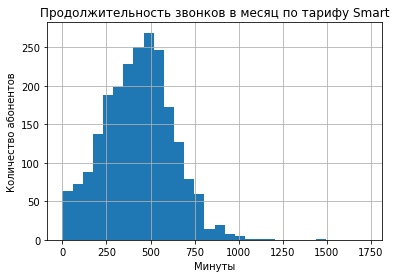

In [50]:
#построим гистограмму распределения общей длительности звонков в месяц по тарифу "Смарт"

total_data_smart['total_calls_duration'].hist(bins=30,range=(0,1727)) 
plt.title('Продолжительность звонков в месяц по тарифу Smart') #добавим подпись для графика
plt.xlabel('Минуты') #добавим подписи осей
plt.ylabel('Количество абонентов')

#выведем график на экран

plt.show()


Как и предполагалось исходя из значений описательных статистик, график имеет положительную скошенность. Стоит отметить, что большинство пользователей разговаривает от 190 до 625 минут в месяц. 

In [51]:
#сделаем срез данных о длительности звонков пользователей с тарифом "Смарт". Рассчитаем основные показатели:
#количество, общую продолжительность разговоров, среднее значение, дисперсию и стандартное отклонение.
#Полученные значения округлим до целых

data_smart_calls = total_data.query('tariff == "smart"').pivot_table(index = ['tariff'],
                              values='total_calls_duration',
                              aggfunc=['count','sum','mean','var','std']).round()

#добавим столбцы с полученными значениями в датасет data_smart_calls

data_smart_calls.columns = ['count','total_duration','mean','variance','standard_duration']

#выведем полученные значения на экран

data_smart_calls

,count,total_duration,mean,variance,standard_duration
tariff,,,,,
smart,2229,957246.0,429.0,37975.0,195.0


Исходя из расчета видно, что в среднем пользователи тарифа "Смарт" разговаривают 429 минут в месяц и укладываются в бесплатные минуты, предоставленные в рамках тарифа. Показатель дисперсии говорит нам о том, что данные имеют сильный разброс. Это же можно сказать и учитывая показатель среднего отклонения.

In [52]:
#сделаем срез данных по тарифу "Ультра"

total_data_ultra = total_data.query('tariff == "ultra"')

#выведем первые 10 строк на экран

total_data_ultra.tail(20)

,user_id,month,calls_count,total_calls_duration,messages_count,gb_used,age,churn_date,city,first_name,...,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name,gb_per_month_included,user_revenue
3188,1106,10,0.0,0.0,33.0,13.70,67,NaN,Калуга,Исаак,...,1000,30720,3000,1950,150,1,1,ultra,30.0,1950.0
3189,1106,11,0.0,0.0,29.0,20.83,67,NaN,Калуга,Исаак,...,1000,30720,3000,1950,150,1,1,ultra,30.0,1950.0
3190,1106,12,0.0,0.0,24.0,18.28,67,NaN,Калуга,Исаак,...,1000,30720,3000,1950,150,1,1,ultra,30.0,1950.0
3191,1231,5,0.0,0.0,55.0,10.61,63,NaN,Чебоксары,Касьян,...,1000,30720,3000,1950,150,1,1,ultra,30.0,1950.0
3192,1231,6,0.0,0.0,201.0,27.19,63,NaN,Чебоксары,Касьян,...,1000,30720,3000,1950,150,1,1,ultra,30.0,1950.0
3193,1231,7,0.0,0.0,211.0,27.09,63,NaN,Чебоксары,Касьян,...,1000,30720,3000,1950,150,1,1,ultra,30.0,1950.0
3194,1231,8,0.0,0.0,180.0,31.34,63,NaN,Чебоксары,Касьян,...,1000,30720,3000,1950,150,1,1,ultra,30.0,2151.0
3195,1231,9,0.0,0.0,188.0,32.45,63,NaN,Чебоксары,Касьян,...,1000,30720,3000,1950,150,1,1,ultra,30.0,2317.5
3196,1231,10,0.0,0.0,185.0,30.31,63,NaN,Чебоксары,Касьян,...,1000,30720,3000,1950,150,1,1,ultra,30.0,1996.5
3197,1231,11,0.0,0.0,173.0,26.79,63,NaN,Чебоксары,Касьян,...,1000,30720,3000,1950,150,1,1,ultra,30.0,1950.0


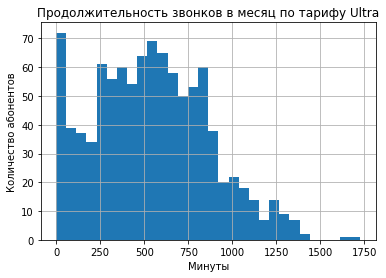

In [53]:
#построим гистограмму распределения общей длительности звонков в месяц по тарифу "Ультра"

total_data_ultra['total_calls_duration'].hist(bins=30,range=(0,1727)) 
plt.title('Продолжительность звонков в месяц по тарифу Ultra') #добавим подпись для графика
plt.xlabel('Минуты') #добавим подписи осей
plt.ylabel('Количество абонентов')

#выведем график на экран

plt.show()

In [54]:
#сделаем срез данных о длительности звонков пользователей с тарифом "Ультра". Рассчитаем основные показатели:
#количество, общую продолжительность разговоров, среднее значение, дисперсию и стандартное отклонение.
#Полученные значения округлим до целых

data_ultra_calls = total_data.query('tariff == "ultra"').pivot_table(index = ['tariff'],values='total_calls_duration',
                              aggfunc=['count','sum','mean','var','std']).round()

#добавим столбцы с полученными значениями в датасет data_ultra_calls

data_ultra_calls.columns = ['count','total_duration','mean','variance','standard_duration']

#выведем полученные значения на экран

data_ultra_calls

,count,total_duration,mean,variance,standard_duration
tariff,,,,,
ultra,985,532668.0,541.0,106106.0,326.0


Пользователи тарифа "Ультра" в среднем разговаривают 541 минуту в месяц и также укладываются в минуты, предоставленные по условиям тарифа. С распределением значений все сложнее, его нельзя назвать нормальным, поскольку есть пользователи, которые практически не используют звонки, но большинство пользователей укладываются в диапазон 230-875 минут разговора в месяц.

In [55]:
#изучим данные об общем количестве отправленных сообщений

total_data['messages_count'].describe()

count    3214.000000
mean       38.281269
std        36.148326
min         0.000000
25%         9.000000
50%        30.000000
75%        57.000000
max       224.000000
Name: messages_count, dtype: float64

Исходя из имеющихся данных, видно, что в среднем пользователи оператора отправляют 38 сообщений в месяц. Максимальное значение отправленных СМС - 224. Аномалией это значение считать не будем, поскольку отправить более 200 СМС вполне реально.

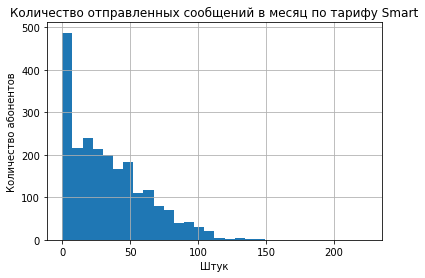

In [56]:
#построим гистограмму распределения общего количества отправленных сообщений в месяц по тарифу "Смарт"

total_data_smart['messages_count'].hist(bins=30,range=(0,224))
plt.title('Количество отправленных сообщений в месяц по тарифу Smart') #добавим подпись для графика
plt.xlabel('Штук') #добавим подписи осей
plt.ylabel('Количество абонентов')

#выведем график на экран

plt.show()

Как и предполагалось, график имеет положительную ассиметрию. Можно заметить, что отправка сообщений не очень популярна среди пользователей тарифа "Смарт". На большинство пользователей приходится от 0 до 50 отправленных сообщений в месяц. 

In [57]:
#сделаем срез данных о количестве отправленных сообщений пользователей с тарифом "Смарт". 
#Рассчитаем основные показатели:количество, общее количество сообщений, среднее значение, 
#дисперсию и стандартное отклонение.Полученные значения округлим до целых

data_smart_messages = total_data.query('tariff == "smart"').pivot_table(index = ['tariff'],
                      values='messages_count',aggfunc=['count','mean','var','std']).round()

#добавим в полученный датасет новые столбцы 

data_smart_messages.columns = ['count','mean','variance','standard_duration']

#выведем полученные значения на экран

data_smart_messages

,count,mean,variance,standard_duration
tariff,,,,
smart,2229,33.0,797.0,28.0


Исходя из полученных данных видно, что в среднем пользователи тарифа "Смарт" отправляют 33 сообщения, что входит в рамки количества СМС, предоставляемых по условиям тарифа.

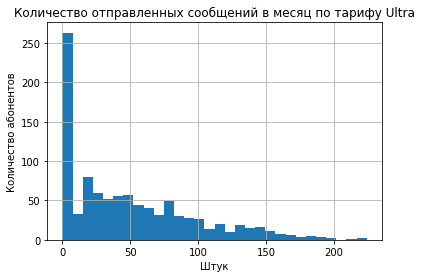

In [58]:
#построим гистограмму распределения общего количества отправленных сообщений в месяц по тарифу "Ультра"

total_data_ultra['messages_count'].hist(bins=30,range=(0,224))
plt.title('Количество отправленных сообщений в месяц по тарифу Ultra') #добавим подпись для графика
plt.xlabel('Штук') #добавим подписи осей
plt.ylabel('Количество абонентов')

#выведем график на экран

plt.show()

По тарифу "Ультра" на большинство пользователей приходится от 0 до 50 отправленных сообщений в месяц, как и по тарифу "Смарт". Распределение значений здесь разбросано в диапазоне сильнее, шире.

In [59]:
#сделаем срез данных о количестве отправленных сообщений пользователей с тарифом "Ультра". 
#Рассчитаем основные показатели:количество, общее количество сообщений, среднее значение, 
#дисперсию и стандартное отклонение.Полученные значения округлим до целых

data_ultra_messages = total_data.query('tariff == "ultra"').pivot_table(index = ['tariff'],
                      values='messages_count',aggfunc=['count','mean','var','std']).round()

#добавим в полученный датасет новые столбцы 

data_ultra_messages.columns = ['count','mean','variance','standard_duration']

#выведем полученные значения на экран

data_ultra_messages

,count,mean,variance,standard_duration
tariff,,,,
ultra,985,49.0,2285.0,48.0


Из данных видно, что пользователи тарифа "Ультра" в среднем отправляют 49 сообщений в месяц, что на 16 сообщени1 больше, чем пользователи тарифа "Смарт". Это может быть вызвано большим количеством включенных в тариф бесплатным СМС. Как и в ситуации с тарифом "Смарт" данные шире разбросаны.

In [60]:
#изучим данные об использованном интернет-трафике

total_data['gb_used'].describe()

count    3214.000000
mean       16.823687
std         7.401779
min         0.000000
25%        12.215000
50%        16.555000
75%        20.950000
max        48.650000
Name: gb_used, dtype: float64

Исходя из представленных данных видно, в среднем пользователи тратят почти 17 Гб интернет-трафика в месяц. Аномальное значение 48 Гб редкое, но, на мой взгляд, вполне возможное. Поскольку медианное значение и среднее практически равны, то данные будут распределены нормально. Построим гистограмму, чтобы в этом убедиться.

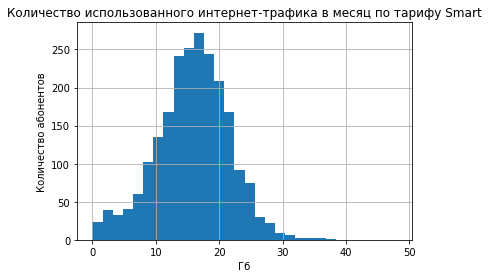

In [61]:
#построим гистограмму распределения общего количества израсходованного интернет-трафика в месяц
#по тарифу "Смарт"

total_data_smart['gb_used'].hist(bins=30,range=(0,48))
plt.title('Количество использованного интернет-трафика в месяц по тарифу Smart') #добавим подпись для графика
plt.xlabel('Гб') #добавим подписи осей
plt.ylabel('Количество абонентов')

#выведем график на экран

plt.show()

Как и предполагалось, распределение по количеству израсходованного интернет-трафика можно назвать нормальным. В целом график вполне симметричен и унимодален. Большинство значений использованного интернет-трафика по тарифу "Смарт" находятся в пределах от 8 до 23 Гб, что превышает объем включенного интернет-трафика.

Изучим данные в разрезе тарифов "Смарт" и "Ультра".

In [62]:
#сделаем срез данных о объеме израсходованного трафика пользователей с тарифом "Смарт". 
#Рассчитаем основные показатели:объем трафика, среднее значение, дисперсию и стандартное отклонение.
#Полученные значения округлим до целых

data_smart_gb_used = total_data.query('tariff == "smart"').pivot_table(index = ['tariff'],
                     values='gb_used',aggfunc=['count','sum','mean','var','std']).round()

#добавим в полученный датасет новые столбцы

data_smart_gb_used.columns = ['count','sum','mean','variance','standard_duration']

#выведем полученные значения на экран

data_smart_gb_used

,count,sum,mean,variance,standard_duration
tariff,,,,,
smart,2229,35326.0,16.0,33.0,6.0


В целом, средний объем израсходованного трафика пользователей тарифа "Смарт" соответствует среднему по генеральной совокупности. Данные распределены нормально.

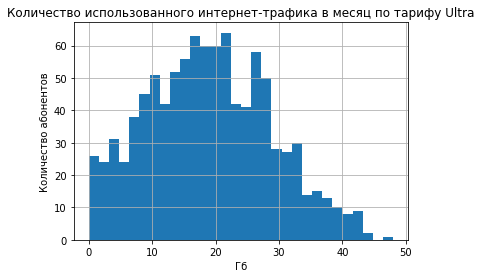

In [63]:
#построим гистограмму распределения общего количества израсходованного интернет-трафика в месяц по тарифу "Ультра"

total_data_ultra['gb_used'].hist(bins=30,range=(0,48))
plt.title('Количество использованного интернет-трафика в месяц по тарифу Ultra') #добавим подпись для графика
plt.xlabel('Гб') #добавим подписи осей
plt.ylabel('Количество абонентов')

#выведем график на экран

plt.show()

Распределение значений израсходованного интернет-трафика по тарифу "Ультра" нельзя назвать нормальным, поскольку оно не умодально и не имеет ярко выраженной симметричности. Большинство пользователей тарифа расходуют от 0 до 34 Гб трафика, что несколько превышает включенный в тариф объем интернет-трафика.

In [64]:
#сделаем срез данных о объеме израсходованного трафика пользователей с тарифом "Ультра". 
#Рассчитаем основные показатели:объем трафика, среднее значение, дисперсию и стандартное отклонение.
#Полученные значения округлим до целых

data_ultra_gb_used = total_data.query('tariff == "ultra"').pivot_table(index = ['tariff'],
                     values='gb_used',aggfunc=['count','sum','mean','var','std']).round()

#добавим в полученный датасет новые столбцы

data_ultra_gb_used.columns = ['count','sum','mean','variance','standard_duration']

#выведем полученные значения на экран

data_ultra_gb_used

,count,sum,mean,variance,standard_duration
tariff,,,,,
ultra,985,18745.0,19.0,97.0,10.0


Пользователи тарифа "Ультра" в среднем расходуют на 3 Гб больше трафика, чем пользователи тарифа "Смарт". Возможно это связано с тем, что больший объем трафика включен в качестве бесплатного по условиям тарифа.

### Вывод

В целом, в среднем как пользователи тарифа "Смарт", так и пользователи тарифа "Ультра" не расходуют в полном объеме включенные в пакеты услуг минуты разговора и сообщений. Однако стоит отметить что:

- пользователи тарифа "Смарт" в среднем используют практически все минуты, предоставленные по условиям пакета, а именно 429 минуту из 500. Пользователи тарифа "Ультра", наоборот, используют в среднем лишь 541 минут из включенных 3000 мин;

- пользователи тарифа "Смарт" также используют и большую часть включенных в тариф сообщений - 33 из 50. Пользователи тарифа "Ультра" не являются любителями отправлять СМС, о чем говорят цифры: в среднем они расходуют всего 49 СМС из 1000, включенных в пакет;

- что касается объема израсходованного интернет-трафика, то среди пользователей тарифа "Смарт" в среднем наблюдается превышение объема использованного трафика на 1 Гб, пользователи тарифа "Ультра" в среднем укладываются в установленный лимит в 30 Гб.

Исходя из этого, следует, что пользователи тарифа "Смарт" более рациональны, поскольку не переплачивают за услуги, которыми не пользуются.

## Проверка гипотез

Для оценки и выбора оптимального тарифа для телеком-оператора необходимо проверить следующие гипотезы:

- средняя выручка пользователей тарифов "Ультра" и "Смарт" различаются;
- средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.

Для проверки первой гипотезы нам необходимо сформулировать нулевую гипотезу и альтернативную:

Но - средняя выручка пользователей тарифов "Ультра" и "Смарт" не различается;

Н1 - средняя выручка пользователей тарифов "Ультра" и "Смарт" различается.

Поскольку у нас представлены две независимые выборки данных, то будем использовать метод t-теста Стьюдента, который вернет нам разницу распределения значений средней выручки двух независимых выборок.

Поскольку есть принятые допустимые уровни статистической значимости (5% и 1%), то выберем один из них, например, 5%.

In [65]:
#зададим уровень статистической значимости

alpha = .05

In [66]:
#проведем проверку первой гипотезы, используя метод st.ttest_ind. В качестве аргументов передадим
#данные выборок, распределение значений которых необходимо изучить

results = st.ttest_ind(
    total_data_smart['user_revenue'],
    total_data_ultra['user_revenue']
)

print('p-значение:', results.pvalue) #выводим на экран значение p-value

if (results.pvalue < alpha): #сравниваем значение p-value  заданный уровень статистической значимости
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")
    
print()    
print('Средняя выручка в месяц с пользователя тарифа Smart -', total_data_smart['user_revenue'].mean().round())
print('Средняя выручка в месяц с пользователя тарифа Ultra -', total_data_ultra['user_revenue'].mean().round())

p-значение: 1.9191028917744757e-284
Отвергаем нулевую гипотезу

Средняя выручка в месяц с пользователя тарифа Smart - 1109.0
Средняя выручка в месяц с пользователя тарифа Ultra - 2061.0


Как видно из проверки гипотезы, значение p-value превышает 0.05, что дает нам возможность отвергнуть нулевую гипотезу. Рассчитанные средние показатели выручки дают нам понять, что выручка пользователей тарифа "Ультра" почти в 2 раза выше, несмотря на стоимость пользования тарифным планом.

Сформулируем нулевую и альтернативную гипотезы для проверки второй гипотезы:

Но - средняя выручка пользователей из Москвы не различается;

Н1 - средняя выручка пользователей из Москвы различается.

Поскольку у нас нет данных о выручке пользователей по городам, сделаем два среза данных: по пользователям из Москвы и из других регионов.


In [67]:
#отфильтруем данные по выручке пользователей из Москвы. Результат сохраним в новом датасете 
#total_data_moscow

total_data_moscow = total_data.query('city == "Москва"')

#выведем первые 10 строк датасета на экран

total_data_moscow.head(20)

,user_id,month,calls_count,total_calls_duration,messages_count,gb_used,age,churn_date,city,first_name,...,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name,gb_per_month_included,user_revenue
8,1001,11,59.0,444.0,0.0,17.99,41,NaN,Москва,Иван,...,50,15360,500,550,200,3,3,smart,15.0,1148.0
9,1001,12,63.0,430.0,0.0,13.73,41,NaN,Москва,Иван,...,50,15360,500,550,200,3,3,smart,15.0,550.0
17,1003,8,55.0,392.0,37.0,8.37,23,NaN,Москва,Белла,...,1000,30720,3000,1950,150,1,1,ultra,30.0,1950.0
18,1003,9,134.0,990.0,91.0,12.20,23,NaN,Москва,Белла,...,1000,30720,3000,1950,150,1,1,ultra,30.0,1950.0
19,1003,10,108.0,866.0,83.0,14.42,23,NaN,Москва,Белла,...,1000,30720,3000,1950,150,1,1,ultra,30.0,1950.0
20,1003,11,115.0,844.0,94.0,11.10,23,NaN,Москва,Белла,...,1000,30720,3000,1950,150,1,1,ultra,30.0,1950.0
21,1003,12,108.0,822.0,75.0,9.88,23,NaN,Москва,Белла,...,1000,30720,3000,1950,150,1,1,ultra,30.0,1950.0
53,1007,4,25.0,202.0,11.0,7.84,65,NaN,Москва,Юна,...,50,15360,500,550,200,3,3,smart,15.0,550.0
54,1007,5,67.0,490.0,39.0,17.32,65,NaN,Москва,Юна,...,50,15360,500,550,200,3,3,smart,15.0,1014.0
55,1007,6,68.0,558.0,26.0,13.36,65,NaN,Москва,Юна,...,50,15360,500,550,200,3,3,smart,15.0,550.0


In [68]:
#отфильтруем данные по выручке пользователей из других регионов. Результат сохраним в новом датасете 
#total_data_regions

total_data_regions = total_data.query('city != "Москва"')

#выведем первые 10 строк датасета на экран

total_data_regions.head(10)

,user_id,month,calls_count,total_calls_duration,messages_count,gb_used,age,churn_date,city,first_name,...,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name,gb_per_month_included,user_revenue
0,1000,5,22.0,164.0,22.0,2.20,52,NaN,Краснодар,Рафаил,...,1000,30720,3000,1950,150,1,1,ultra,30.0,1950.0
1,1000,6,43.0,187.0,60.0,22.69,52,NaN,Краснодар,Рафаил,...,1000,30720,3000,1950,150,1,1,ultra,30.0,1950.0
2,1000,7,47.0,346.0,75.0,13.71,52,NaN,Краснодар,Рафаил,...,1000,30720,3000,1950,150,1,1,ultra,30.0,1950.0
3,1000,8,52.0,418.0,81.0,13.75,52,NaN,Краснодар,Рафаил,...,1000,30720,3000,1950,150,1,1,ultra,30.0,1950.0
4,1000,9,58.0,478.0,57.0,14.27,52,NaN,Краснодар,Рафаил,...,1000,30720,3000,1950,150,1,1,ultra,30.0,1950.0
5,1000,10,57.0,363.0,73.0,14.37,52,NaN,Краснодар,Рафаил,...,1000,30720,3000,1950,150,1,1,ultra,30.0,1950.0
6,1000,11,43.0,344.0,58.0,14.41,52,NaN,Краснодар,Рафаил,...,1000,30720,3000,1950,150,1,1,ultra,30.0,1950.0
7,1000,12,46.0,341.0,70.0,9.56,52,NaN,Краснодар,Рафаил,...,1000,30720,3000,1950,150,1,1,ultra,30.0,1950.0
10,1002,6,15.0,118.0,4.0,10.61,59,NaN,Стерлитамак,Евгений,...,50,15360,500,550,200,3,3,smart,15.0,550.0
11,1002,7,26.0,219.0,11.0,17.15,59,NaN,Стерлитамак,Евгений,...,50,15360,500,550,200,3,3,smart,15.0,980.0


In [69]:
#проведем проверку первой гипотезы, используя метод st.ttest_ind. В качестве аргументов передадим
#данные выборок, распределение значений которых необходимо изучить

results = st.ttest_ind(
    total_data_moscow['user_revenue'],
    total_data_regions['user_revenue']
)

print('p-значение:', results.pvalue) #выводим на экран значение p-value

if (results.pvalue < alpha): #сравниваем значение p-value  заданный уровень статистической значимости
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")
    
print()    
print('Средняя выручка в месяц с пользователя из Москвы:', total_data_moscow['user_revenue'].mean().round())
print('Средняя выручка в месяц с пользователя из региона:', total_data_regions['user_revenue'].mean().round())

p-значение: 0.24326220384871397
Не получилось отвергнуть нулевую гипотезу

Средняя выручка в месяц с пользователя из Москвы: 1433.0
Средняя выручка в месяц с пользователя из региона: 1393.0


Как видно из проверки гипотезы, значение p-value не превышает 0.05, что не дает нам возможности отвергнуть нулевую гипотезу. Рассчитанные средние показатели выручки дают нам понять, что выручка пользователей из Москвы больше всего на 40 рублей, чем пользователей из регионов.

### Вывод

В целом, в среднем помесячная выручка по пользователям тарифа "Ультра" почти вдвое выше, чем по пользователям тарифа "Смарт" (2061 руб. и 1109 руб. соответственно). Вероятно, это связано с тем, что стоимость услуг тарифа "Ультра" значительно выше, чем тарифа "Смарт". Также результаты расчетов подтверждают гипотезу о том, что средняя помесячная выручка с пользователя из Москвы на 40 руб. выше, чем того, кто живет в регионах.

## Общий вывод

В ходе проведения исследования были замечены следующие закономерности:
    
1. Пользователи тарифа "Смарт" в целом рационально используют предоставленные тарифом услуги: выговаривают в среднем в месяц 429 минуты из включенных 500, отправляют 33 сообщений из 50. Однако, в среднем наблюдается перерасход интернет-трафика на 1 Гб, что формирует дополнительную выручку телеком-компании.

2. Пользователи тарифа "Ультра" не используют по максимуму возможности своего тарифа: тратят 541 минуту из 3000 включенных, 49 СМС из 1000 и 19 Гб из 30.

3. Что касается средней помесячной выручки, то она ожидаемо выше у пользователей тарифа "Ультра" и составляет 2061 руб. против 1109 руб. у пользователей тарифа "Смарт". Тут стоит отметить, что несмотря на это, пользователей тарифа "Ультра" у телеком-компании вдвое меньше, чем пользователей тарифа "Смарт" - 951 и 2223 соответственно. Если бы мы оценивали совокупную выручку со всех пользователей, то этот показатель был бы примерно равен по двум тарифам.

4. Также из результатов исследования следует, что пользователь из Москвы в среднем приносит телеком компании на 40 рублей больше выручки в месяц, чем пользователь услуг из региона.

Несмотря на то, что средняя помесячная выручка выше у тарифа "Ультра", учитывая количество пользователей этого тарифа, нельзя однозначно сделать вывод, что этот тариф оптимальнее. На мой взгляд, как в регионах, так и в Москве, необходимо продвигать оба тарифа.